<a href="https://colab.research.google.com/github/MagnoSales/TELECOMX2_DESAFIO/blob/main/1_PREPARACAODOSDADOS_TELECOMX2_DESAFIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


#Importando Arquivo para trabalhar

In [79]:
url = "https://raw.githubusercontent.com/MagnoSales/TELECOMX2_DESAFIO/refs/heads/main/DataSet/dados_tratados.csv"

df = pd.read_csv(url)

df = pd.DataFrame(df)

df.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


In [80]:
df.shape

(7043, 22)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

In [82]:
# Nulos
print("Numero de Nulos", df.isnull().sum())

Numero de Nulos customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
Total.Day                    11
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64


In [83]:
# Substituindo nulos por "zeros"
df['Total.Day'] = df['Total.Day'].fillna(0)
df['account.Charges.Total'] = df['account.Charges.Total'].fillna(0)

# Verificando se ainda existem nulos:
print("Numero de Nulos apos substituicao:", df[['Total.Day', 'account.Charges.Total']].isnull().sum())

Numero de Nulos apos substituicao: Total.Day                0
account.Charges.Total    0
dtype: int64


#Remoção de Colunas Irrelevantes

In [84]:
df_clean = df.drop(['customerID','phone.MultipleLines','internet.OnlineSecurity','internet.OnlineBackup',
                    'internet.DeviceProtection','internet.TechSupport','internet.StreamingTV',
                    'internet.StreamingMovies', 'Total.Day'],
                   axis=1) #não faz sentido serem mantidas no modelo por não ter valor preditivo ou por redundância ou colinearidade como 'Total.Day"

In [85]:
# Verifique se há valores únicos em cada coluna
for col in df_clean.columns:
  print(f"valores únicos na coluna'{col}': {df_clean[col].nunique()}")
  if df_clean[col].nunique() < 80: # Imprima os valores somente se não houver muitos
    print(df_clean[col].unique())
  print('-' * 80)  # Linha divisória para melhor visualização

valores únicos na coluna'Churn': 2
['No' 'Yes']
--------------------------------------------------------------------------------
valores únicos na coluna'customer.gender': 2
['Female' 'Male']
--------------------------------------------------------------------------------
valores únicos na coluna'customer.SeniorCitizen': 2
[0 1]
--------------------------------------------------------------------------------
valores únicos na coluna'customer.Partner': 2
['Yes' 'No']
--------------------------------------------------------------------------------
valores únicos na coluna'customer.Dependents': 2
['Yes' 'No']
--------------------------------------------------------------------------------
valores únicos na coluna'customer.tenure': 73
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
-----------------------------------

#Encoding

In [86]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [87]:
colunas = df_clean.columns

In [88]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['customer.gender','customer.Partner','customer.Dependents','phone.PhoneService',
     'internet.InternetService','account.Contract','account.PaperlessBilling','account.PaymentMethod', 'Churn']
),
remainder = 'passthrough',
sparse_threshold=0)

In [89]:
df_clean = one_hot.fit_transform(df_clean)

In [90]:
dados = pd.DataFrame(df_clean, columns = one_hot.get_feature_names_out(colunas)).copy()
dados

,onehotencoder__customer.gender_Male,onehotencoder__customer.Partner_Yes,onehotencoder__customer.Dependents_Yes,onehotencoder__phone.PhoneService_Yes,onehotencoder__internet.InternetService_DSL,onehotencoder__internet.InternetService_Fiber optic,onehotencoder__internet.InternetService_No,onehotencoder__account.Contract_Month-to-month,onehotencoder__account.Contract_One year,onehotencoder__account.Contract_Two year,onehotencoder__account.PaperlessBilling_Yes,onehotencoder__account.PaymentMethod_Bank transfer (automatic),onehotencoder__account.PaymentMethod_Credit card (automatic),onehotencoder__account.PaymentMethod_Electronic check,onehotencoder__account.PaymentMethod_Mailed check,onehotencoder__Churn_Yes,remainder__customer.SeniorCitizen,remainder__customer.tenure,remainder__account.Charges.Monthly,remainder__account.Charges.Total
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0,65.60,593.30
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0,59.90,542.40
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,73.90,280.85
3,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,13.0,98.00,1237.85
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13.0,55.15,742.90
7039,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,22.0,85.10,1873.70
7040,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,50.30,92.75
7041,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,67.0,67.85,4627.65


#Verificação da Proporção de Evasão

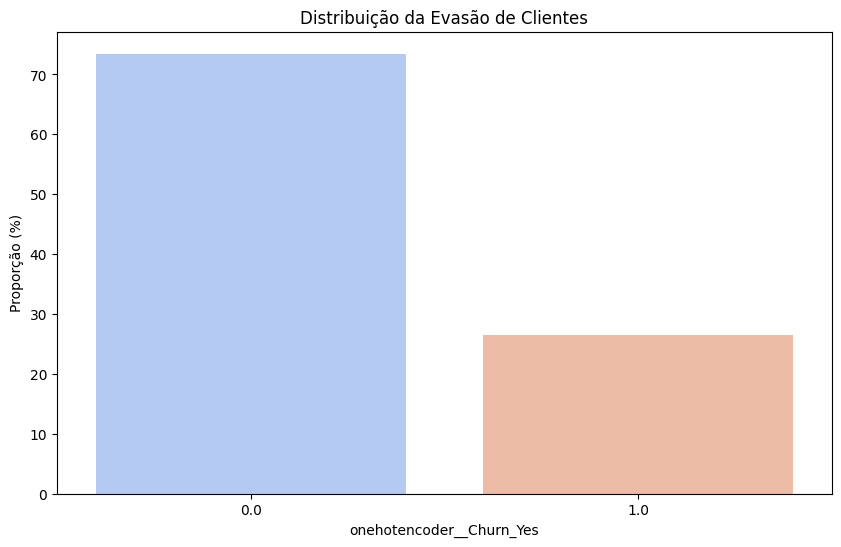


📊 FREQUENCIA ABSOLUTA:
-----------------------
onehotencoder__Churn_Yes
0.0    5174
1.0    1869
Name: count, dtype: int64
-

📈 PROPORÇÃO (%):
-----------------
onehotencoder__Churn_Yes
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64
-



In [91]:
# Proporção gráfica da Evasão
frequencia = dados['onehotencoder__Churn_Yes'].value_counts()
proporcao = dados['onehotencoder__Churn_Yes'].value_counts(normalize=True) * 100

# Visualizar com gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=proporcao.index, y=proporcao.values, hue=proporcao.index, palette='coolwarm', legend=False)
plt.ylabel('Proporção (%)')
plt.title('Distribuição da Evasão de Clientes')
plt.show()

# Exibir os resultados
print("\n📊 FREQUENCIA ABSOLUTA:")
print("-" * 23)
print(frequencia)
print("-\n" * 1)
print("📈 PROPORÇÃO (%):")
print("-" * 17)
print(proporcao)
print("-\n")

Resultado mostra que o modelo está desbalanceado. Classe 1 é menor que 30%

#Validação Cruzada (com balanceamento)

In [92]:
x = dados.drop('onehotencoder__Churn_Yes', axis =1)
y = dados['onehotencoder__Churn_Yes']

In [93]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
modelo = DecisionTreeClassifier()
modelo.fit(x, y)
modelo.score(x, y)
print(f'Acurácia: {modelo.score(x,y)}')

Acurácia: 0.9973022859576884


In [95]:
from sklearn.model_selection import train_test_split

In [96]:
x, x_teste, y, y_teste = train_test_split(x, y, test_size = 0.15, stratify = y, random_state = 5)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y, random_state = 5)

In [97]:
modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 0.9975495656048118
Acurácia de validação: 0.7321309285237141


In [98]:
modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 0.8723546446870127
Acurácia de validação: 0.760187040748163


#Avaliando o modelo

In [99]:
from sklearn.metrics import confusion_matrix

In [100]:
y_previsto = modelo.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_previsto)
print(matriz_confusao)

[[953 147]
 [212 185]]


In [101]:
from sklearn.metrics import ConfusionMatrixDisplay

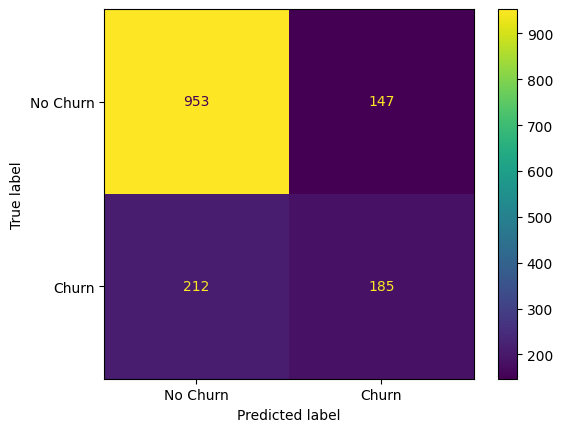

In [102]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['No Churn', 'Churn'])
visualizacao.plot();

Superior Esquerdo (959): True Negative (Verdadeiro Negativo): O modelo previu "No Churn" e o valor real era "No Churn". Isso significa que 959 clientes que não iriam abandonar foram corretamente identificados como "No Churn".

Superior Direito (141): False Positive (Falso Positivo) ou Erro Tipo I: O modelo previu "Churn", mas o valor real era "No Churn". Isso significa que 141 clientes que não iriam abandonar foram incorretamente classificados como "Churn".

Inferior Esquerdo (198): False Negative (Falso Negativo) ou Erro Tipo II: O modelo previu "No Churn", mas o valor real era "Churn". Isso significa que 198 clientes que iriam abandonar foram incorretamente classificados como "No Churn".

Inferior Direito (199): True Positive (Verdadeiro Positivo): O modelo previu "Churn" e o valor real era "Churn". Isso significa que 199 clientes que iriam abandonar foram corretamente identificados como "Churn".

#Métricas de avaliação

Acurácia, precisão e recall

In [103]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

In [104]:
print(f'Acurácia: {accuracy_score(y_val, y_previsto)}')
print(f'Precisão: {precision_score(y_val, y_previsto)}')
print(f'Revocação: {recall_score(y_val, y_previsto)}')
print(f'F1-score: {f1_score(y_val, y_previsto)}')

Acurácia: 0.760187040748163
Precisão: 0.5572289156626506
Revocação: 0.4659949622166247
F1-score: 0.5075445816186557


#Curva ROC

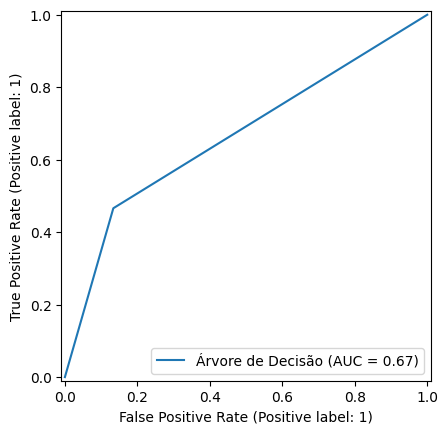

In [105]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de Decisão');

In [106]:
from sklearn.metrics import roc_auc_score
print(f'AUC: {roc_auc_score(y_val, y_previsto)}')

AUC: 0.6661792992901304


#Curva de precisão x recall

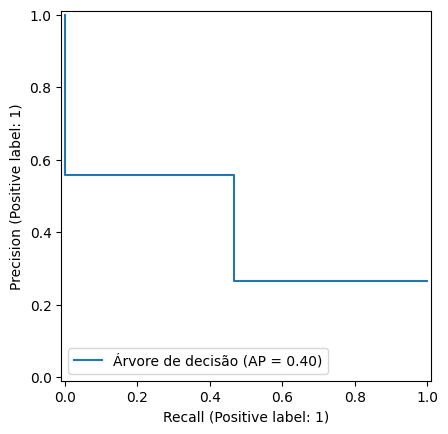

In [107]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de decisão');

In [108]:
from sklearn.metrics import average_precision_score
print(f'AP: {average_precision_score(y_val, y_previsto)}')

AP: 0.40128243396649355


#Relatório de métricas

In [109]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

         0.0       0.82      0.87      0.84      1100
         1.0       0.56      0.47      0.51       397

    accuracy                           0.76      1497
   macro avg       0.69      0.67      0.67      1497
weighted avg       0.75      0.76      0.75      1497



#Validação cruzada

Usando o KFold

In [110]:
from sklearn.model_selection import cross_validate, KFold

In [111]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = kf)
cv_resultados

{'fit_time': array([0.02410865, 0.02223349, 0.0219779 , 0.02192211, 0.02187753]),
 'score_time': array([0.00230074, 0.00239968, 0.00227928, 0.00222921, 0.00225854]),
 'test_score': array([0.73706177, 0.76106934, 0.72263993, 0.76106934, 0.76524645])}

In [112]:
cv_resultados['test_score']

array([0.73706177, 0.76106934, 0.72263993, 0.76106934, 0.76524645])

In [113]:
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()
print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

Intervalo de confiança: [0.7160492553155471, 0.7827854775935201]


#Validação cruzada com recall

In [114]:
def intervalo_conf(resultados):
    media = resultados['test_score'].mean()
    desvio_padrao = resultados['test_score'].std()
    print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

In [115]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = kf, scoring = 'recall')
cv_resultados

{'fit_time': array([0.02419329, 0.02475762, 0.0241251 , 0.02350664, 0.02177691]),
 'score_time': array([0.00456691, 0.00611997, 0.00539088, 0.00426555, 0.00405645]),
 'test_score': array([0.41584158, 0.57184751, 0.47692308, 0.53164557, 0.54276316])}

In [116]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.39715933716819274, 0.6184490212029516]


#Estratificando os dados

In [117]:
dados['onehotencoder__Churn_Yes'].value_counts(normalize = True)

,proportion
onehotencoder__Churn_Yes,
0.0,0.73463
1.0,0.26537


In [118]:
from sklearn.model_selection import StratifiedKFold
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = skf, scoring = 'recall')
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.4183486428769027, 0.5811077386876866]


#Balanceado dados

In [119]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

In [120]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

x_balanceado, y_balanceado = oversample.fit_resample(x,y)

In [121]:
y_balanceado.value_counts(normalize= True)

,proportion
onehotencoder__Churn_Yes,
0.0,0.5
1.0,0.5


In [122]:
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle= True, random_state=5)
cv_resultados = cross_validate(modelo,x_balanceado,y_balanceado, cv= skf, scoring='recall')

In [123]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.8079494846739164, 0.8572718412129385]


# Normalização ou Padronização (se necessário)
Considerando o modelo de Árvore de Decisão usado, a normalização ou padronização dos dados de entrada não é estritamente necessária.

In [124]:
from sklearn.preprocessing import StandardScaler

# Inicializa o scaler
scaler = StandardScaler()

# Ajusta o scaler nos dados de treino e transforma os dados de treino
x_treino_scaled = scaler.fit_transform(x_treino)

# Transforma os dados de validação e teste usando o scaler ajustado nos dados de treino
x_val_scaled = scaler.transform(x_val)
x_teste_scaled = scaler.transform(x_teste)

# Opcional: Converter de volta para DataFrame para manter nomes das colunas (útil para visualização ou análise)
x_treino_scaled = pd.DataFrame(x_treino_scaled, columns=x_treino.columns)
x_val_scaled = pd.DataFrame(x_val_scaled, columns=x_val.columns)
x_teste_scaled = pd.DataFrame(x_teste_scaled, columns=x_teste.columns)

print("Dados de treino padronizados:")
display(x_treino_scaled.head())

print("\nDados de validação padronizados:")
display(x_val_scaled.head())

print("\nDados de teste padronizados:")
display(x_teste_scaled.head())

Dados de treino padronizados:


,onehotencoder__customer.gender_Male,onehotencoder__customer.Partner_Yes,onehotencoder__customer.Dependents_Yes,onehotencoder__phone.PhoneService_Yes,onehotencoder__internet.InternetService_DSL,...,onehotencoder__account.PaymentMethod_Mailed check,remainder__customer.SeniorCitizen,remainder__customer.tenure,remainder__account.Charges.Monthly,remainder__account.Charges.Total
0,0.997108,-0.970365,-0.654063,0.331308,-0.725501,...,-0.535020,2.259974,-0.425077,1.055120,-0.091867
1,-1.002900,1.030540,-0.654063,0.331308,1.378358,...,-0.535020,2.259974,1.207861,0.495605,1.116896
2,-1.002900,1.030540,1.528904,0.331308,1.378358,...,-0.535020,-0.442483,1.493625,-0.032176,0.867066
3,0.997108,1.030540,-0.654063,-3.018337,1.378358,...,-0.535020,-0.442483,1.493625,-0.162451,0.779350
4,-1.002900,1.030540,1.528904,0.331308,1.378358,...,1.869089,-0.442483,-0.792488,-0.065580,-0.651088



Dados de validação padronizados:


,onehotencoder__customer.gender_Male,onehotencoder__customer.Partner_Yes,onehotencoder__customer.Dependents_Yes,onehotencoder__phone.PhoneService_Yes,onehotencoder__internet.InternetService_DSL,...,onehotencoder__account.PaymentMethod_Mailed check,remainder__customer.SeniorCitizen,remainder__customer.tenure,remainder__account.Charges.Monthly,remainder__account.Charges.Total
0,0.997108,-0.970365,-0.654063,0.331308,-0.725501,...,-0.535020,-0.442483,-1.200722,1.344064,-0.869074
1,-1.002900,1.030540,-0.654063,0.331308,-0.725501,...,-0.535020,-0.442483,1.248684,1.457637,2.023182
2,-1.002900,1.030540,1.528904,0.331308,-0.725501,...,1.869089,-0.442483,-1.159898,-1.495266,-0.978123
3,0.997108,-0.970365,-0.654063,0.331308,1.378358,...,-0.535020,-0.442483,1.616095,0.898122,1.917645
4,0.997108,1.030540,1.528904,0.331308,1.378358,...,-0.535020,-0.442483,1.452801,0.792900,1.696788



Dados de teste padronizados:


,onehotencoder__customer.gender_Male,onehotencoder__customer.Partner_Yes,onehotencoder__customer.Dependents_Yes,onehotencoder__phone.PhoneService_Yes,onehotencoder__internet.InternetService_DSL,...,onehotencoder__account.PaymentMethod_Mailed check,remainder__customer.SeniorCitizen,remainder__customer.tenure,remainder__account.Charges.Monthly,remainder__account.Charges.Total
0,0.997108,1.030540,-0.654063,0.331308,-0.725501,...,-0.53502,-0.442483,1.534448,-1.511968,-0.378577
1,-1.002900,-0.970365,-0.654063,-3.018337,1.378358,...,-0.53502,-0.442483,-1.037428,-0.835539,-0.882302
2,-1.002900,-0.970365,-0.654063,0.331308,-0.725501,...,-0.53502,-0.442483,-0.425077,0.799580,-0.178744
3,-1.002900,1.030540,1.528904,0.331308,-0.725501,...,-0.53502,-0.442483,-0.547547,-1.343278,-0.805275
4,0.997108,1.030540,1.528904,-3.018337,1.378358,...,-0.53502,-0.442483,1.616095,0.017930,1.048327
